### importing the libraries

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

Get the csv data from different months into one csv

In [3]:
path = '../SalesAnalysis/Sales_Data/'
df = pd.read_csv(path+'Sales_July_2019.csv');
files = [file for file in os.listdir(path)]
csvs = []
for i in files:
    csvs.append(pd.read_csv(path+i))
all_month_data = pd.concat(csvs)
all_month_data.to_csv('all_month_data.csv', index = False)

### Reading the newly created csv file

In [4]:
all_data = pd.read_csv('all_month_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data['month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [6]:
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df.head()

# removing all the data with null values
all_data = all_data.dropna(how = 'all')

### Converting the month column type from string to int

Finding the data with 'Or' in the month column and removing them

In [7]:
#all_data[all_data['month'] == 'Or'].count()
all_data = all_data[all_data['month'] != 'Or']
all_data['month'] = all_data['month'].astype('int')

In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null object
Purchase Address    185950 non-null object
month               185950 non-null int32
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


### Lets add another column "sales" which is equals to the "quantity" * "price each"

In [9]:
#make the type to int for multiplication
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int')
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## QUESTION 1: In which month the sale was the maximum
How much was earned that month?

In [10]:
all_data.groupby('month').sum()

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [11]:
maxSale = max(all_data.groupby('month').sum())
print(maxSale)
result = all_data.groupby('month').sum()
all_data.get('sales').describe()

sales


count    185950.000000
mean        185.490917
std         332.919771
min           2.990000
25%          11.950000
50%          14.950000
75%         150.000000
max        3400.000000
Name: sales, dtype: float64

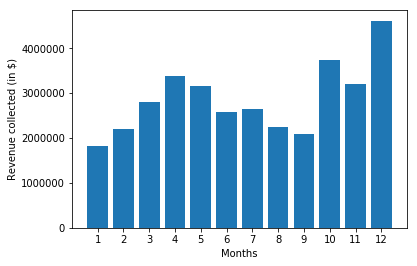

In [12]:
month = list(range(1,13))
plt.bar(month, result['sales'])
plt.xlabel('Months')
plt.ylabel('Revenue collected (in $)')
plt.xticks(month)


plt.show()

## QUESTION 2: which city has purchased the most

#### Let's augment a city column in our data set with the country shortcode

In [22]:
def get_state(address):
    return address.split(',')[-1].split(' ')[1]
all_data['city'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1]+' '+ get_state(x))
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [32]:
city_sales = all_data.groupby('city').sum()['sales']
city_sales

city
 Atlanta GA          2.795499e+06
 Austin TX           1.819582e+06
 Boston MA           3.661642e+06
 Dallas TX           2.767975e+06
 Los Angeles CA      5.452571e+06
 New York City NY    4.664317e+06
 Portland ME         4.497583e+05
 Portland OR         1.870732e+06
 San Francisco CA    8.262204e+06
 Seattle WA          2.747755e+06
Name: sales, dtype: float64

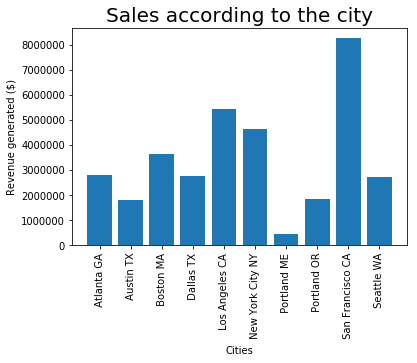

In [53]:
cities = [city for city, values in all_data.groupby('city')] #values store the sum for different columns

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title('Sales according to the city', fontdict = {'fontsize':20})
plt.bar(cities, city_sales)
plt.xticks(cities, rotation="vertical")
plt.xlabel('Cities')
plt.ylabel('Revenue generated ($)')
plt.show()

## QUESTION 3: what time should we display the advertisments to maximize the likelihood of customer's buying the products

#### Let's convert the order date into datetime to make calculations a little easy

In [63]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# augmenting hour and minute columns
all_data['hour'] = all_data['Order Date'].dt.hour
all_data['minute'] = all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


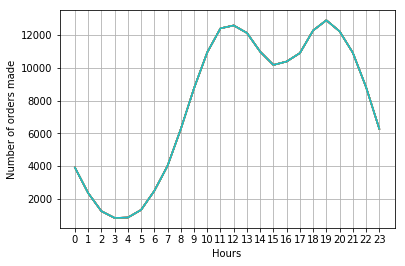

In [81]:
hours = [hour for hour, values in all_data.groupby('hour')]

plt.grid()
plt.xlabel('Hours')
plt.ylabel("Number of orders made")
plt.xticks(hours)
plt.plot(hours, all_data.groupby('hour').count())

plt.show()

#ANSWER: the ads should be shown around 11:00am or between 6:00pm-7:00pm

## QUESTION 4: what products are mostly sold together?

In [82]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27


In [101]:
# all the ordes having the same order id means they are brought together. So lets find the products that have the same order id

df = all_data[all_data['Order ID'].duplicated(keep = False)]

# let's add a new column grouped to group the products that have been brought togehter
df['grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,minute,grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,"Google Phone, Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,42,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,31,"Bose SoundSport Headphones, Bose SoundSport He..."


In [109]:
# the df now have multiple rows having the same values of "grouped"
# let's drop the duplicated rows
df.drop_duplicates('grouped', inplace = True)
df = df[['Order ID', 'grouped']]
df.head()

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,grouped
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"


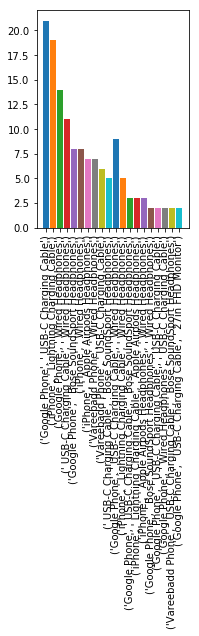

In [166]:
# let's find the count of the products
from itertools import combinations as comb
from collections import Counter

count_2 = Counter()
count_3 = Counter()
for row in df['grouped']:
    row_list = row.split(',')
    count_2.update(Counter(comb(row_list, 2))) # (2) to find the two products that are bought together (we can use 3 to find out the combination of three products that were bought together)
    count_3.update(Counter(comb(row_list, 3)))

most_common_10 = count_2.most_common(10)
plt.subplot(1,2,1)
for row in most_common_10:
    keys.append(row[0])
    plt.bar(str(row[0]), row[1])
plt.xticks(rotation ="vertical")
plt.show()

# frequently brought 3 items toghter
most_3_common_10 = count_3.most_common(10)
plt.subplot(1,2,1)
for row in most_3_common_10:
    keys.append(row[0])
    plt.bar(str(row[0]), row[1])
plt.xticks(rotation ="vertical")
plt.show()

    
